# Credit Card Fraud Detection

Imoporting the Dependacies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

from sklearn import metrics
pd.set_option('display.max_columns', None)
sns.set(rc = {'figure.figsize':(15,8)})

Import Data

In [ ]:
# download the dataset from https://www.kaggle.com/datasets/kartik2112/fraud-detection
train_df = pd.read_csv('fraudTrain.csv', index_col=0)
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_df = pd.read_csv('fraudTest.csv', index_col=0)
test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Data imbalance check

In [ ]:
labels=["Genuine","Fraud"]
train_df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
fig = px.pie(values=train_df['is_fraud'].value_counts(), names=labels , color_discrete_sequence=["skyblue","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

<Axes: xlabel='is_fraud', ylabel='count'>

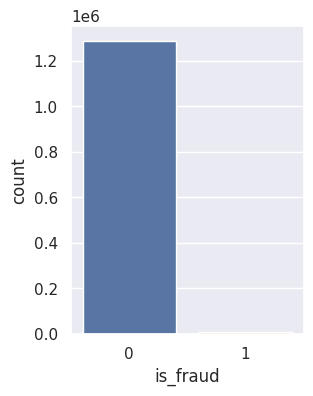

In [ ]:
plt.figure(figsize=(3,4))
sns.countplot(train_df, x='is_fraud')

In [ ]:
print('Genuine:', round(train_df['is_fraud'].value_counts()[0]/len(train_df) * 100,2), '% of the dataset')
print('Frauds:', round(train_df['is_fraud'].value_counts()[1]/len(train_df) * 100,2), '% of the dataset')

Genuine: 99.42 % of the dataset
Frauds: 0.58 % of the dataset


Dropping duplicated values

In [ ]:
train_df.drop_duplicates(inplace=True)

Checking null values

In [ ]:
train_df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

##Exploratory Data Analysis

In [ ]:
train_df.amt.describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

Transaction amount vs Fraud

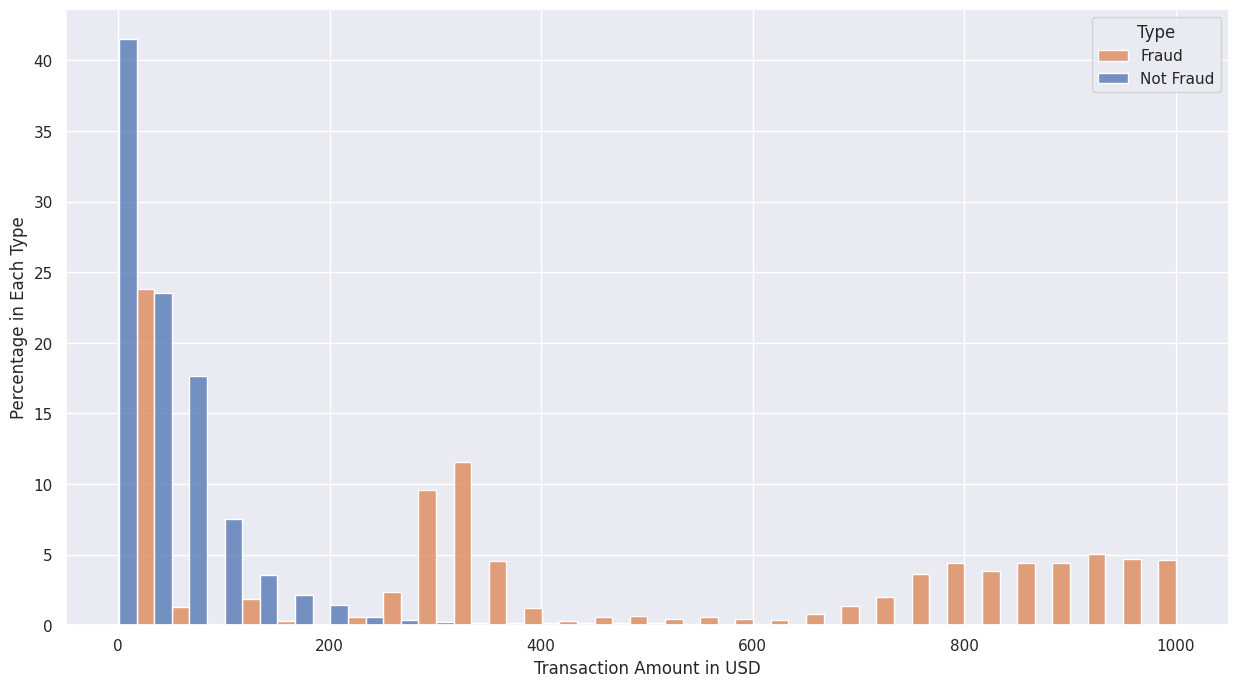

In [ ]:
ax=sns.histplot(x='amt',data=train_df[train_df.amt<1000],hue='is_fraud',stat='percent',multiple='dodge', common_norm=False, bins=30)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

fraudulent transactions peak around \$300 and then at the $800-\$1000 range

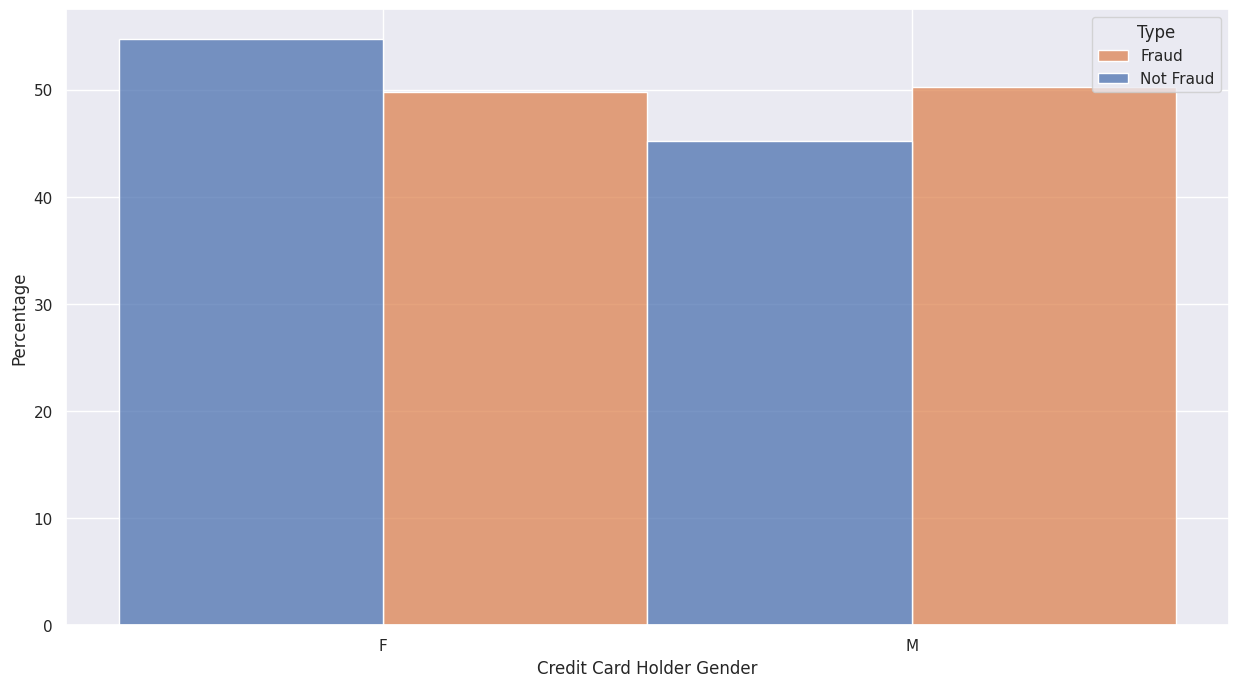

In [ ]:
ax=sns.histplot(x='gender',data=train_df, hue='is_fraud', multiple='dodge', stat='percent',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

we do not see a clear difference between both genders.

Spending Category vs Fraud

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

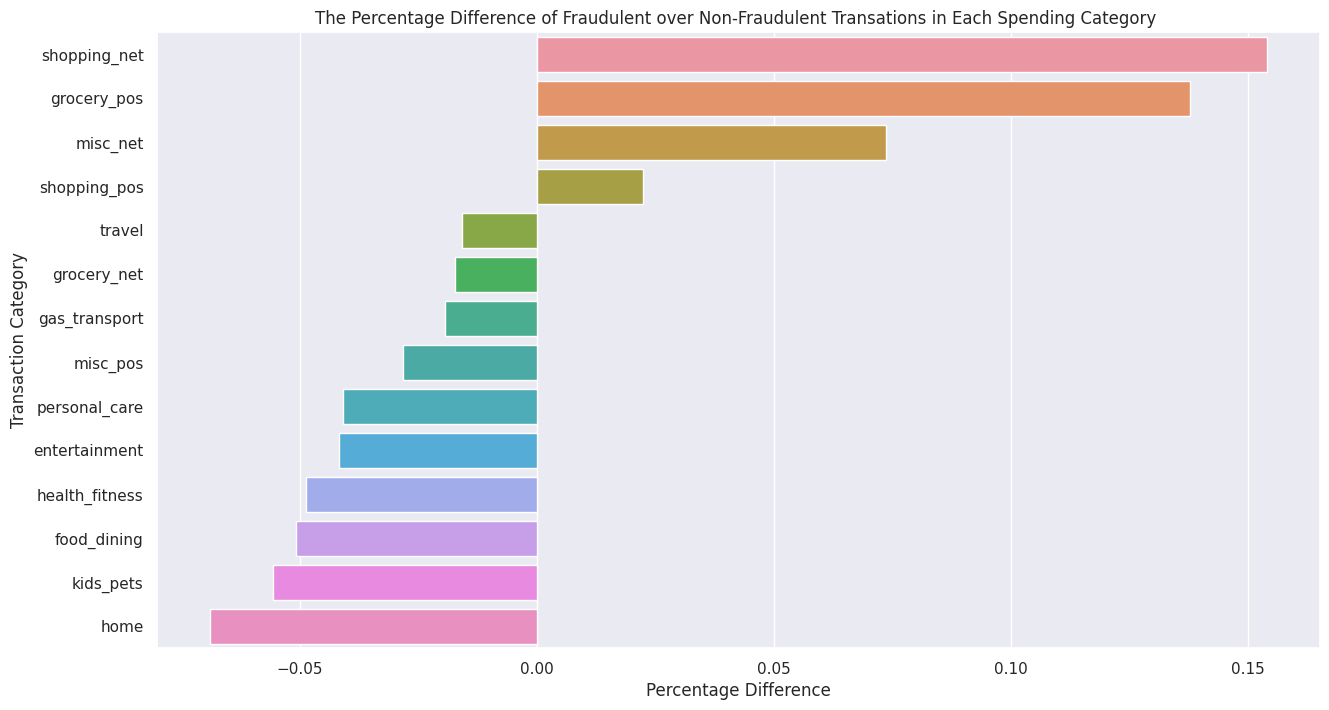

In [ ]:
not_fraud_category = train_df[train_df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
not_fraud_category.columns = ['category','not fraud percentage']\

fraud_category = train_df[train_df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
fraud_category.columns = ['category', 'fraud percentage']

merged_df = not_fraud_category.merge(fraud_category, on='category')
merged_df['diff'] = merged_df['fraud percentage']-merged_df['not fraud percentage']

ax=sns.barplot(y='category',x='diff',data=merged_df.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')



Fraud tends to happen more often in 'Shopping_net', 'Grocery_pos', and 'misc_net' while 'home' and 'kids_pets' among others tend to see more normal transactions than fraudulent ones.

Hourly Trend


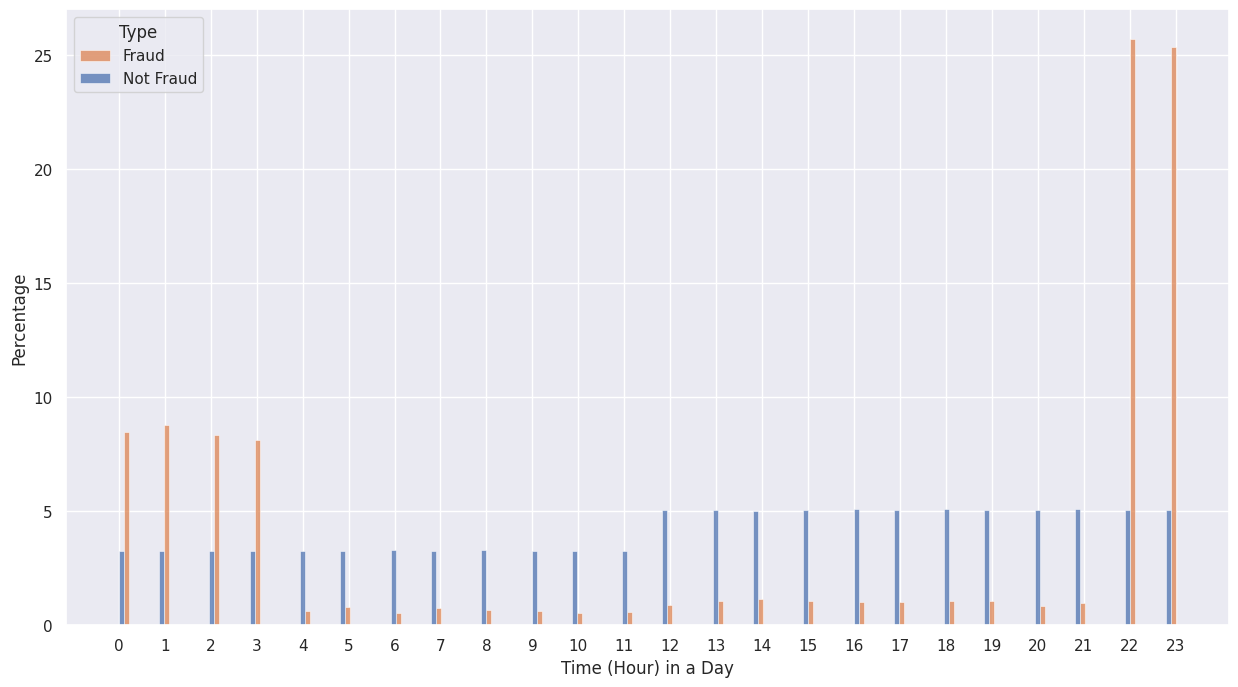

In [ ]:
train_df['hour']=pd.to_datetime(train_df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=train_df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

fraudulent payments happen disproportionately around midnight when most people are asleep!

Day of the week vs fraud

<ipython-input-69-f7a74c5cc215>:3: UserWarning:

FixedFormatter should only be used together with FixedLocator



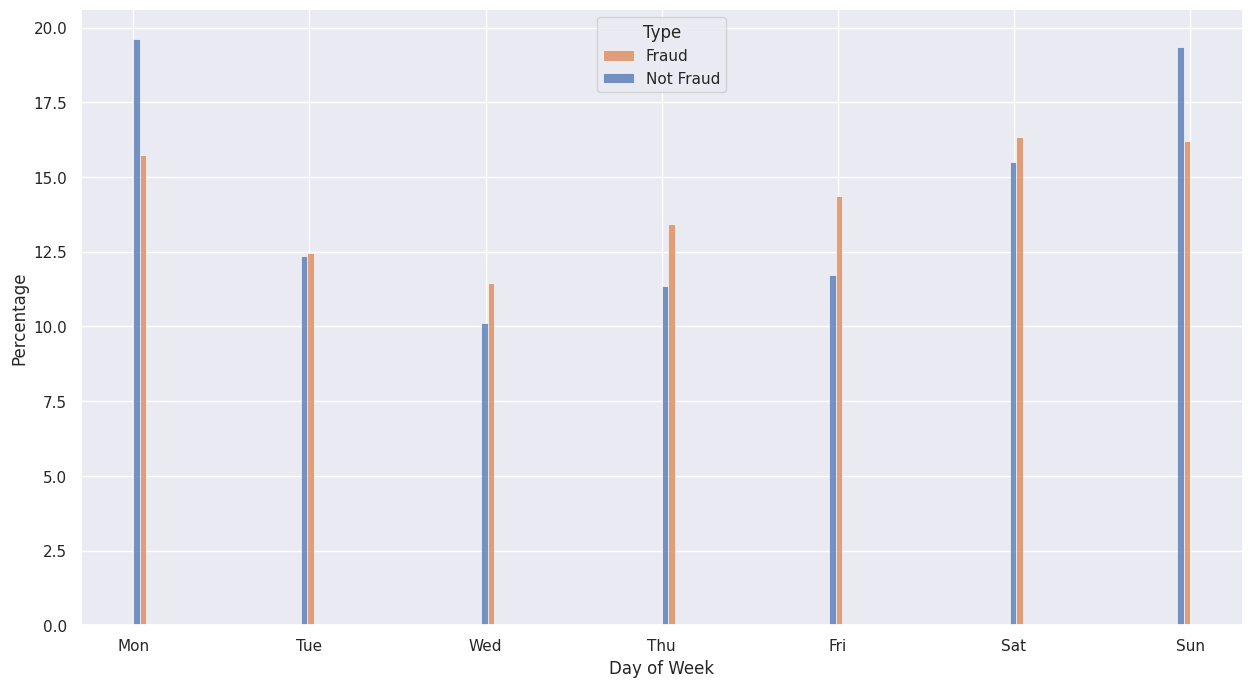

In [ ]:
train_df['day'] = pd.to_datetime(train_df['trans_date_trans_time']).dt.dayofweek
ax = sns.histplot(data=train_df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['', "Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.

month vs fraud

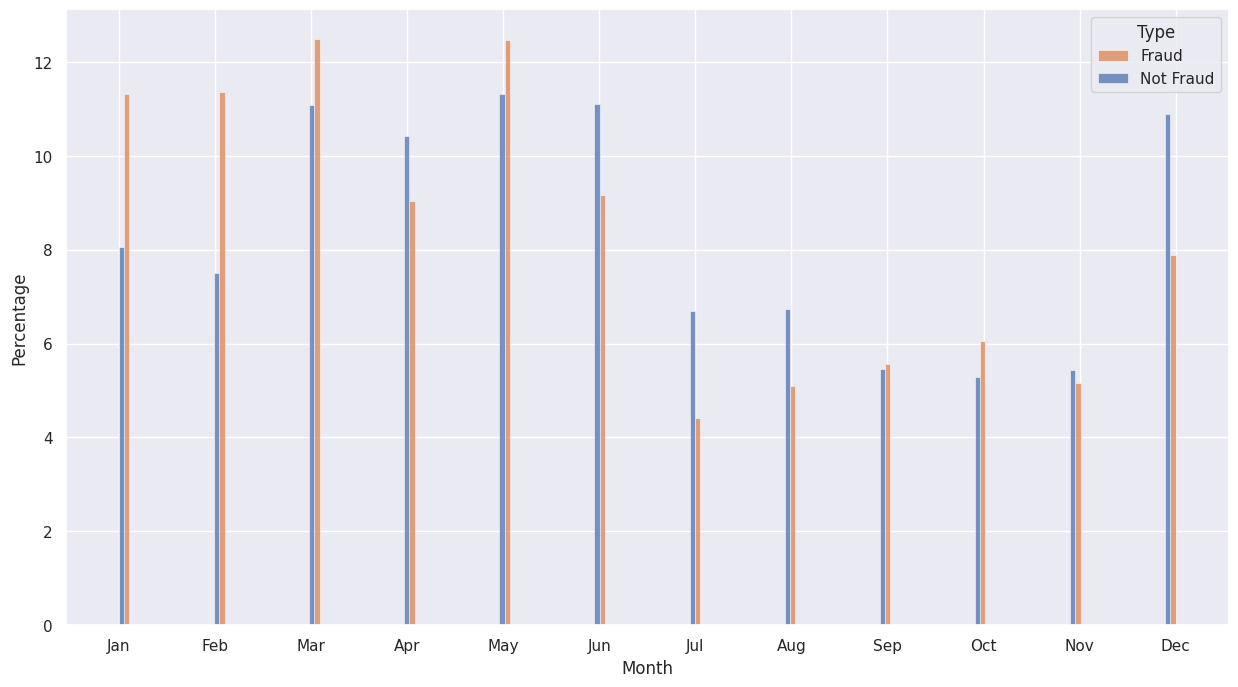

In [ ]:
train_df['month']=pd.to_datetime(train_df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=train_df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

fraudulent transactions are more concentrated in Jan-May

 State vs Fraud

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

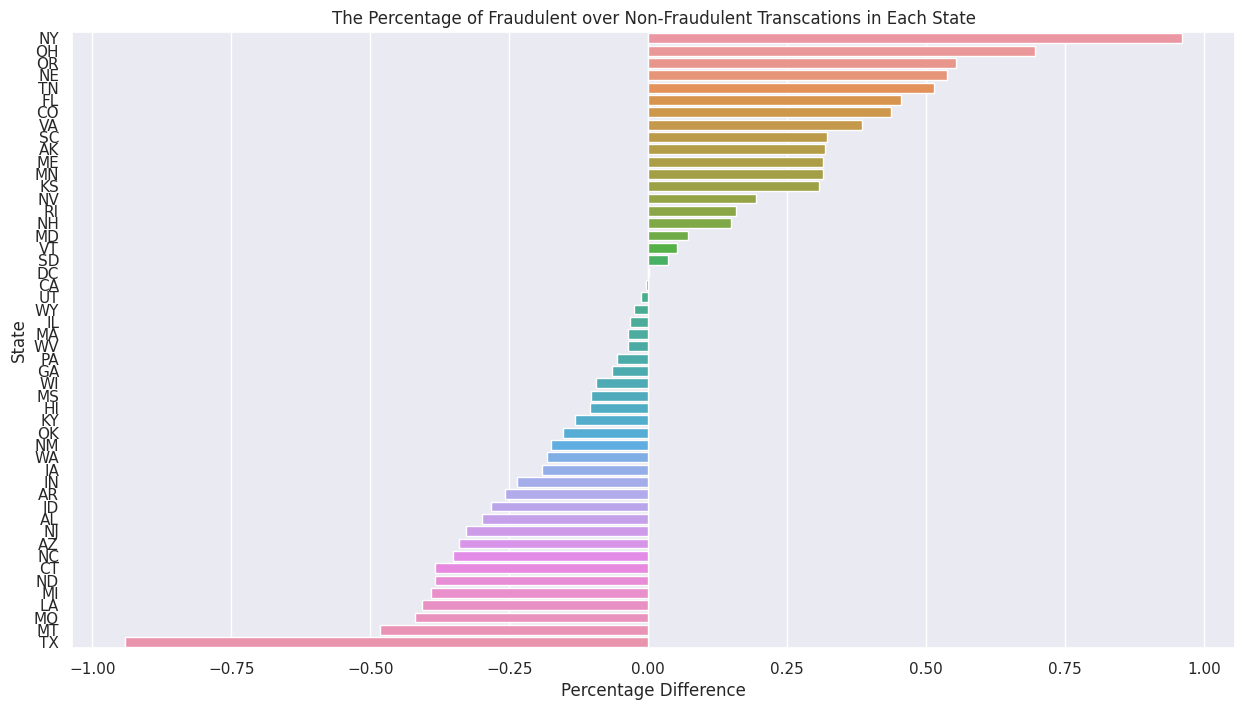

In [ ]:
a=train_df['state'][train_df.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['State', 'Per']

b=train_df['state'][train_df.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['State', 'Per']
merged=a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

As can be seen, NY and OH among others have a higher percentage of fraudulent transactions

##Data Modeling and Prediction


feature chosen based on EDA

In [ ]:
import datetime as dt

train_df['age'] = dt.date.today().year - pd.to_datetime(train_df['trans_date_trans_time']).dt.year

train=train_df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
train.head()

,category,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud
0,misc_net,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,4,0,1,1,0
1,grocery_pos,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,4,0,1,1,0
2,entertainment,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,4,0,1,1,0
3,gas_transport,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,4,0,1,1,0
4,misc_pos,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,4,0,1,1,0


In [ ]:
train=pd.get_dummies(train, drop_first=True)
train.head()

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,month,is_fraud,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,28654,36.0788,-81.1781,3495,36.011293,-82.048315,4,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,107.23,99160,48.8878,-118.2105,149,49.159047,-118.186462,4,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,220.11,83252,42.1808,-112.2620,4154,43.150704,-112.154481,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45.00,59632,46.2306,-112.1138,1939,47.034331,-112.561071,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,41.96,24433,38.4207,-79.4629,99,38.674999,-78.632459,4,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis=1).values

apply same on test data

In [ ]:
test_df['age']=dt.date.today().year-pd.to_datetime(test_df['dob']).dt.year
test_df['hour']=pd.to_datetime(test_df['trans_date_trans_time']).dt.hour
test_df['day']=pd.to_datetime(test_df['trans_date_trans_time']).dt.dayofweek
test_df['month']=pd.to_datetime(test_df['trans_date_trans_time']).dt.month

test_df=test_df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
test_df=pd.get_dummies(test_df, drop_first=True)
y_test=test_df['is_fraud'].values
X_test=test_df.drop("is_fraud", axis='columns').values

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

###logistic regression modeling and metrics

In [ ]:
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_test, predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97    553574
           1       0.06      0.75      0.10      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[526429  27145]
 [   534   1611]]


###Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.82      0.68      0.74      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.84      0.87    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[553245    329]
 [   693   1452]]
Share of Non-Fraud in Test Data: 0.9961


###XGBOOST classifier

In [ ]:
from xgboost import XGBClassifier
model3 = XGBClassifier()
model3.fit(X_resampled,y_resampled)
predicted=model3.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.76      0.72      0.74      2145

    accuracy                           1.00    555719
   macro avg       0.88      0.86      0.87    555719
weighted avg       1.00      1.00      1.00    555719

Confusion matrix:
 [[553077    497]
 [   609   1536]]
